<a href="https://colab.research.google.com/github/Surihub/Recommender-system/blob/main/TIMSS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIMSS 전처리 및 탐색적 데이터 분석
- import packages & data
- 데이터 전처리(trainset & testset)
- EDA

## import packages & Data

In [ ]:
import time
import math 
import random 
import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive

# 데이터 불러오기
drive.mount("/content/gdrive/")
path = "/content/gdrive/MyDrive/2023석사논문코드/"
iteminfo = pd.read_csv(path+"iteminfo_ME10_ME11.csv")
timss19 = pd.read_csv(path+"df_RFS_ME10_ME11.csv", index_col=0).drop(labels = ['IDCNTRY',"IDSTUD"], axis = 1)
display(iteminfo.head(3))
print(iteminfo.shape)
display(timss19.head(3))
print(timss19.shape)

Mounted at /content/gdrive/


,Unnamed: 0,Block,Block_seq,Content_Domain,Topic_Area,Cognitive_Domain,Item_Type,Label,correct_per1,correct_per2,Item_ID
0,ME72187,ME10,1,Number,Integers,Knowing,CR,Sum of two numbers with exponents,0.556271,0.566869,ME72187
1,ME62271,ME11,1,Number,Fractions and Decimals,Knowing,MC,Randy's blue balloons,0.504519,0.510844,ME62271
2,ME72022,ME10,2,Number,Fractions and Decimals,Reasoning,MC,Value of P x Q on number line,0.395196,0.402929,ME72022


(28, 11)


,ME72187,ME72022,ME72045,ME72049,ME72069,ME72074,ME72013,ME72095,ME72109,ME72125,...,ME62230_F,ME62095_F,ME62076_F,ME62030_F,ME62171_F,ME62301_F,ME62194_F,ME62344_F,ME62320_F,ME62296_F
784_50010216,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,2.0,3.0,3.0,2.0,3.0,6.0,3.0,3.0,2.0
784_50010314,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0
784_50030104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


(8077, 84)


## 데이터 전처리(trainset & testset)

In [ ]:
## input data : timss19(pd.DataFrame 형태)
Utility_mat_total = timss19

# n_item : 문항정보표에서 가져오기
n_item = len(iteminfo)

# item_list : ME00000, 문항
item_list = Utility_mat_total.columns[n_item * 0 :n_item * 1] # 전체 아이템 리스트

# time_list : ME00000_S, 문항에 소요된 시간
time_list = Utility_mat_total.columns[n_item * 1 :n_item * 2] # 아이템_S

# freq_list : ME00000_F, 문항 클릭 빈도수
freq_list = Utility_mat_total.columns[n_item * 2 :n_item * 3] # 아이템_F

# response only
U_R = Utility_mat_total[item_list]

# sptime only
U_S = Utility_mat_total[time_list]

# frequency only
U_F = Utility_mat_total[freq_list]

# user item matrix를 row matrix로 변환(역 pivot) 함수
def ui_to_row(df):
    temp = df.copy()
    temp["IDSTUD"] = temp.index
    df_row = pd.melt(temp, id_vars = "IDSTUD", var_name = 'Item_ID', value_name = 'value')
    # na 제거
    #df_row = df_row.dropna()
    df_row['Item_ID'] = df_row['Item_ID'].apply(lambda x: x[:7])
    return df_row

display(ui_to_row(U_R).head(3))
display(ui_to_row(U_S).head(3))
display(ui_to_row(U_F).head(3))

,IDSTUD,Item_ID,value
0,784_50010216,ME72187,1.0
1,784_50010314,ME72187,0.0
2,784_50030104,ME72187,1.0


,IDSTUD,Item_ID,value
0,784_50010216,ME72187,76.072
1,784_50010314,ME72187,8.873
2,784_50030104,ME72187,57.437


,IDSTUD,Item_ID,value
0,784_50010216,ME72187,3.0
1,784_50010314,ME72187,1.0
2,784_50030104,ME72187,1.0


## 탐색적 데이터 분석(EDA)

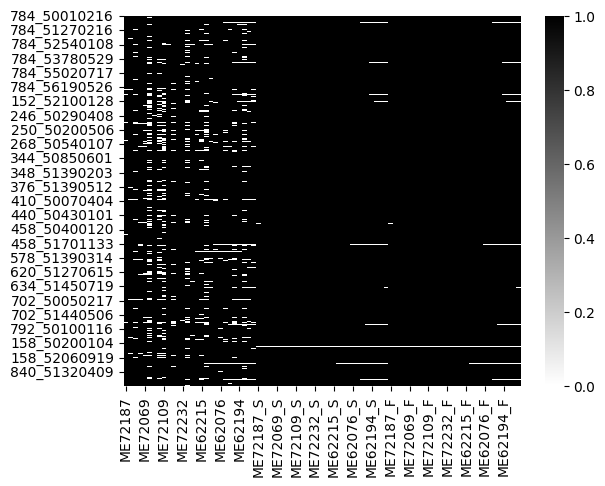

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap using seaborn : na에 해당하는 것만 흰색으로 보여주기
sns.heatmap(Utility_mat_total.notna(), cmap='binary')
plt.show()

발견한 사실들
1. 정오답의 무응답 유형
- 각각 정오답, 소요시간, 빈도수에서 정오답은 유난히 무응답이 많은 것을 알 수 있음
- 무응답의 처리 방법에는 유형에는 여러 가지가 있는데, 시간이 주어져있고 1번 이상 클릭했는데도 불구하고 응답하지 않은 경우는 '오답'으로 보아야 할 수 있다. (물론 데이터를 버려도 되긴 한다).
- 시간과 빈도수에서 공통적으로 비어있는 학생의 경우 문제를 보지도 않고 pass했다고 볼 수 있다. 이 경우는 오답으로 분류하기가 애매하지 않을까 싶다. 
2. 문항(열)의 정오답 부분에서 유난히 많이 빈 문제가 있다. 어려운 문제인가? 
3. 학생(행)의 입장에서도 유난히 빈 부분이 있다. 2, 3번 모두 데이터 편향의 문제가 생길 수 있다. 
3. 시간과 빈도수도 히트맵을 분리해서 그려볼 필요가 있다. 


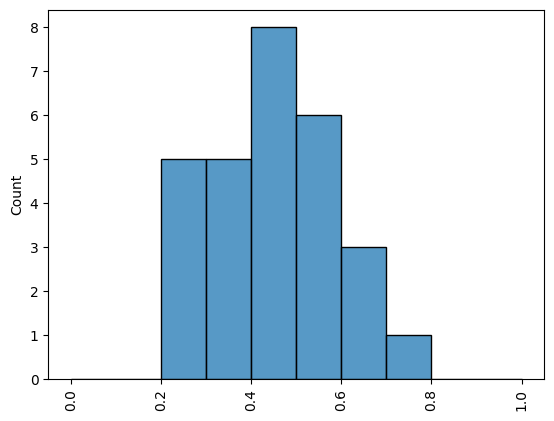

In [ ]:
# 문항별 난이도 분포
sns.histplot(data = U_R.mean(), binwidth = 0.1, binrange = [0,1])
plt.xticks(rotation = 90)
plt.show()

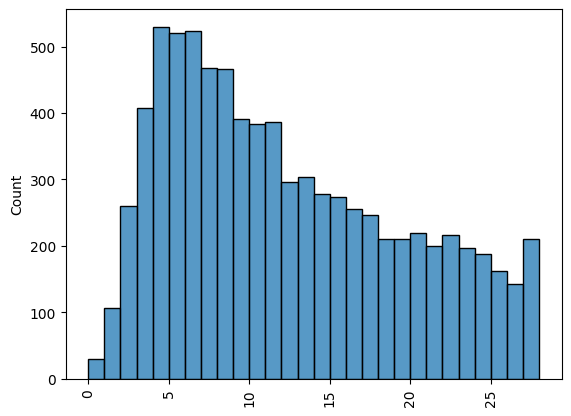

In [ ]:
# 학생별 문항 점수 histplot
sns.histplot(data = U_R.T.sum(), binwidth = 1, binrange = [0,28])
plt.xticks(rotation = 90)
plt.show()

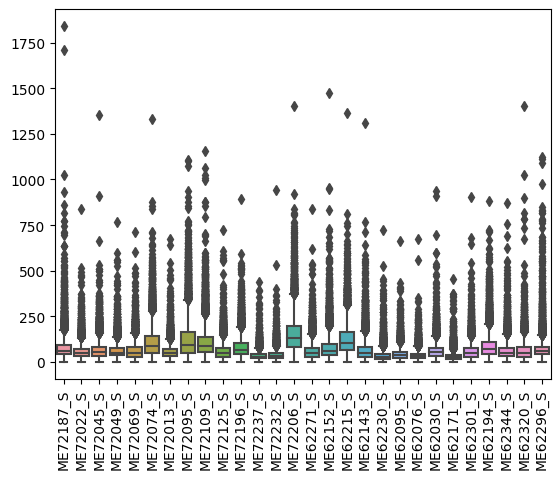

In [ ]:
# 문항 반응 시간 boxplot
sns.boxplot(data=timss19[time_list])
plt.xticks(rotation = 90)
plt.show() 

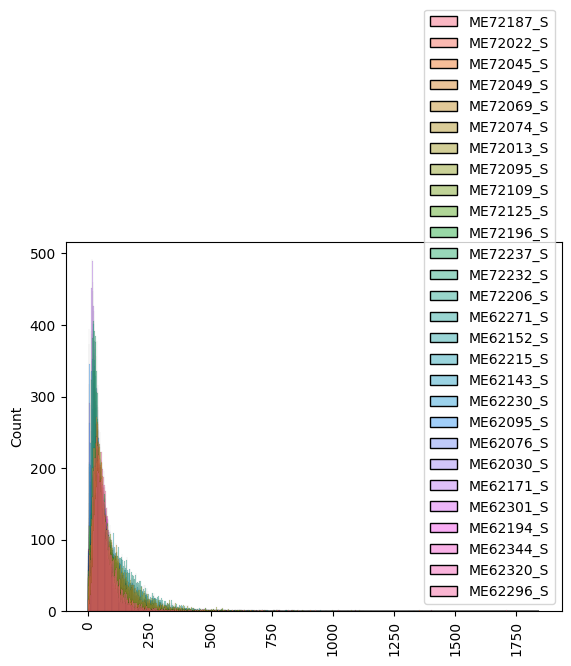

In [ ]:
# 문항 반응 시간 histplot
sns.histplot(data = timss19[time_list])#, binwidth = 0.2, binrange = [-10, 10])
plt.xticks(rotation = 90)
plt.show()

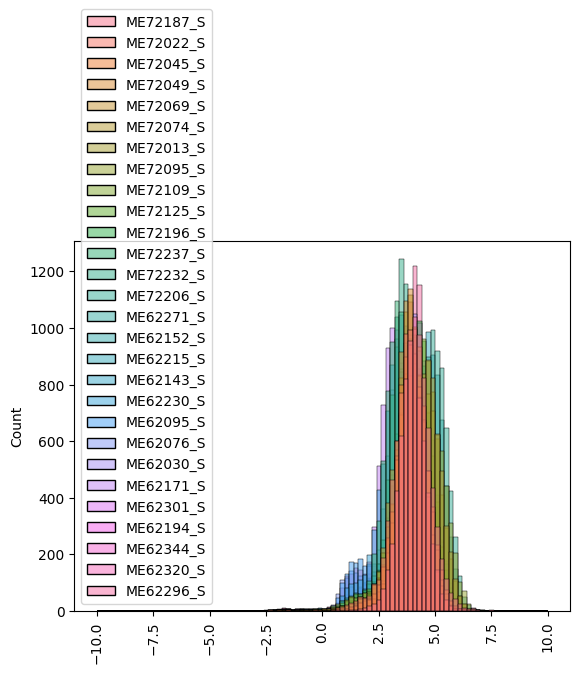

In [ ]:
def log_transform(x):
    return np.log(x)

# 문항 반응 시간 모든 값을 로그변환 처리
sns.histplot(data = timss19[time_list].apply(log_transform), binwidth = 0.2, binrange = [-10, 10])
plt.xticks(rotation = 90)
plt.show()

## 응답 패턴 관찰하기